TTTT Analysis
======
This Notebook is simply a playground to examine the resulting histograms from the main TTTT analysis executable.

In [158]:
import ROOT
from IPython.display import display, display_markdown
%load_ext autoreload
%autoreload 2
import random
from utils import HistCollection as HC
from utils import clear, show_event, show_value, normalize_columns, CANVAS, PDG

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


First, we need to load the pre-processed datafiles. These will generally contain a set of histograms of various quantities calculated from data in the input MiniTrees. However, they can also contain things besides histograms. For example, C++ STL containers can be serialized to the ROOT file to save things such as counters or even "raw" event information.

In [159]:
hists_TTZ = HC("TTZ", "../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree.root")
hists_TTW = HC("TTW", "../data/TTWToLNu_treeProducerSusyMultilepton_tree.root")
hists_TTTT = HC("TTTT", "../data/TTTT_ext_treeProducerSusyMultilepton_tree.root")

Loading unchanged result file  ../data/TTZToLLNuNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTWToLNu_treeProducerSusyMultilepton_tree_result.root
Loading unchanged result file  ../data/TTTT_ext_treeProducerSusyMultilepton_tree_result.root


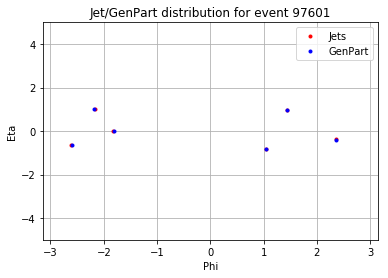

In [160]:
def plot_Jet_eta_phi(dataset, event_number = None):
    import matplotlib.pyplot as plt
    %matplotlib inline
    if event_number is None:
        event_number = random.randint(0,len(dataset.Jet_pt)-1)
    phis = list(dataset.Jet_phi[event_number])
    etas = list(dataset.Jet_eta[event_number])
    mc_phis = list(dataset.GenPart_phi[event_number])
    mc_etas = list(dataset.GenPart_eta[event_number])
    mc_ids = list(dataset.GenPart_pdgId[event_number])
    
    mc_phis,mc_etas = zip(*[(phi, eta) for phi, eta, pdgid in zip(mc_phis,mc_etas,mc_ids) if abs(pdgid) in {1,2,3,4,5,21}]) 
    
    plt.plot(phis,etas, 'r.', label='Jets')
    plt.plot(mc_phis,mc_etas, 'b.', label='GenPart')
    plt.xlim(-3.14159, 3.14159)
    plt.ylim(-5,5)
    plt.xlabel('Phi')
    plt.ylabel('Eta')
    plt.title("Jet/GenPart distribution for event {}".format(event_number))
    plt.grid()
    plt.legend()
    plt.show()
    
plot_Jet_eta_phi(hists_TTZ)

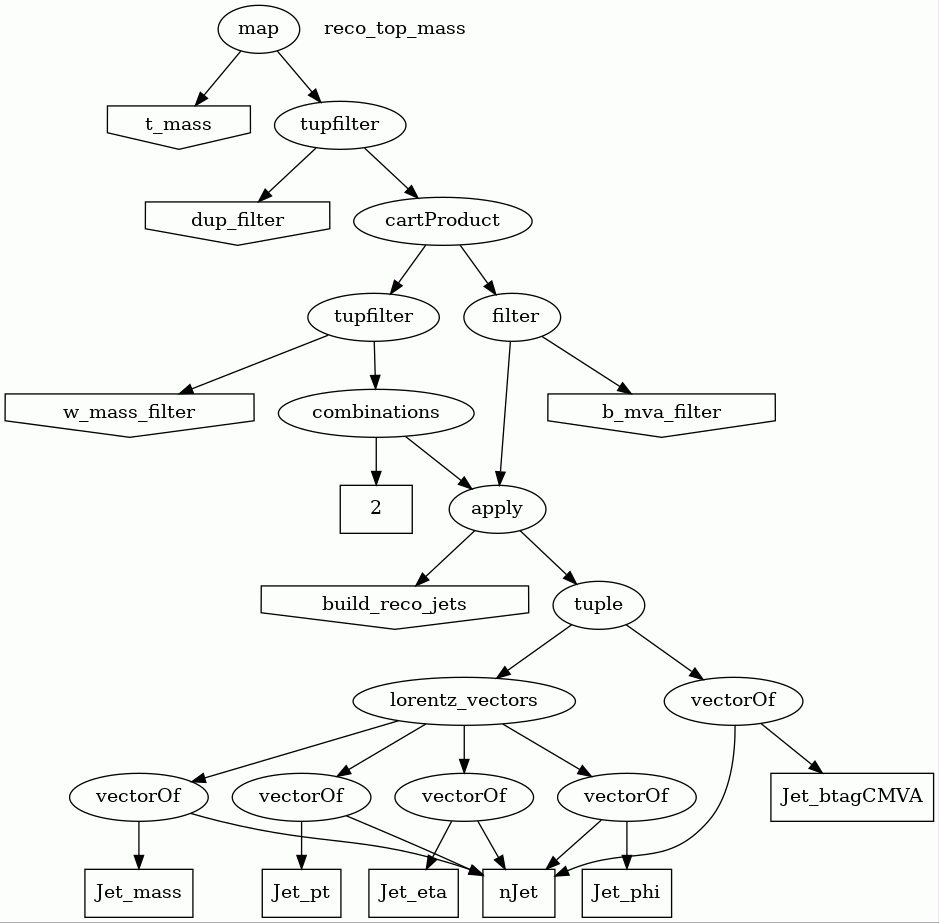

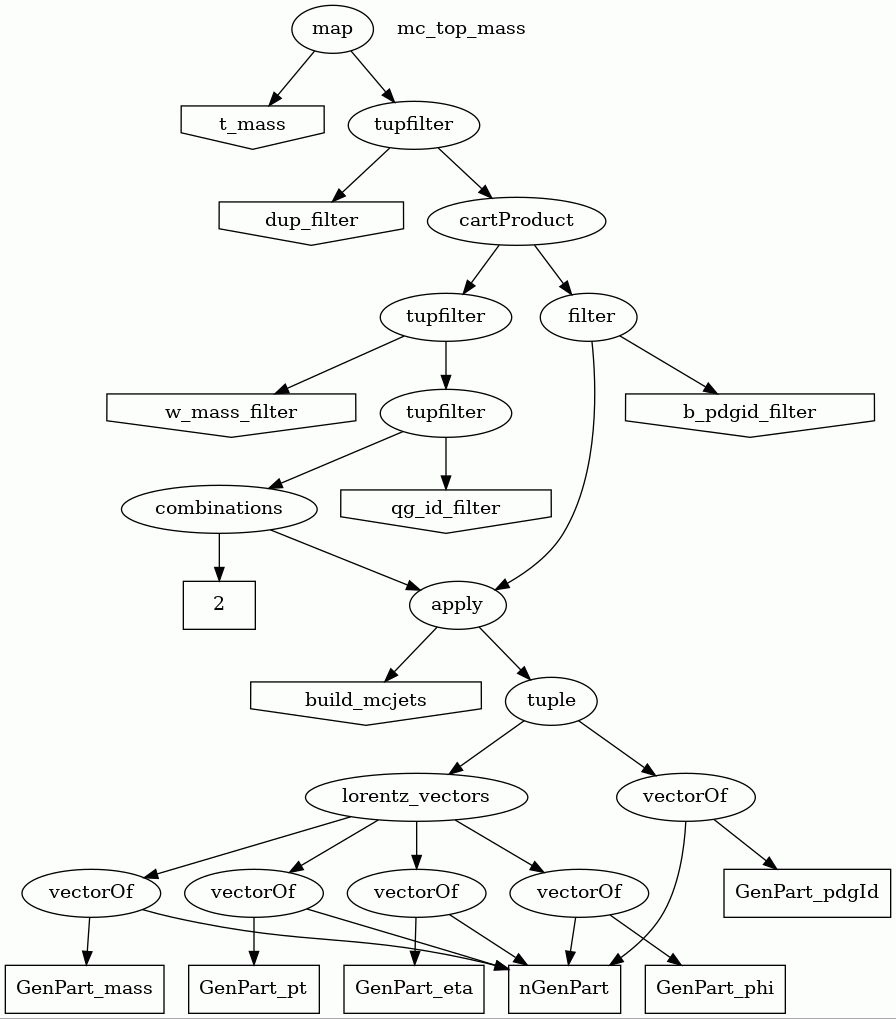

In [161]:
display(show_value(hists_TTTT.reco_top_mass))
display(show_value(hists_TTTT.mc_top_mass))

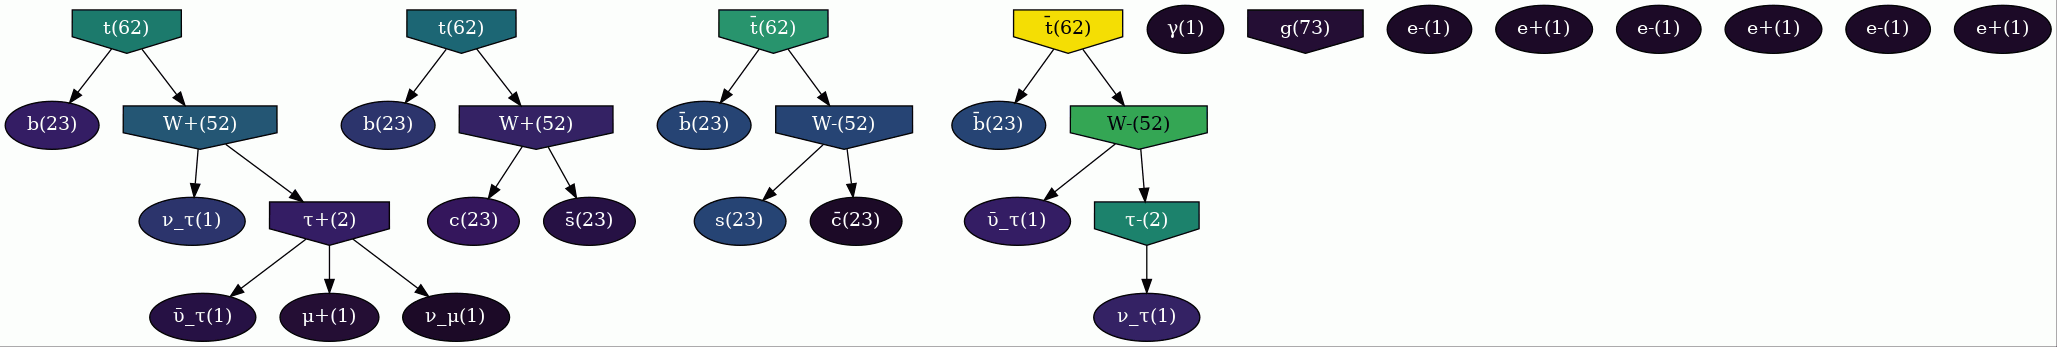

s   |b̄  |b̄  |g   |b   |g   |c   |s̄  |g   
0   |b   |b   |0   |b   |0   |s   |s   |0   
0   |t̄  |t̄  |0   |t   |0   |t̄  |t   |0   


In [162]:
n = 0
def to_str(vec):
    return '|'.join(map(lambda s: "{!s:<4s}".format(PDG.get(s,s)),vec))
print(to_str(hists_TTTT.Jet_mcFlavour[n]))
print(to_str(hists_TTTT.Jet_mcMatchFlav[n]))
print(to_str(hists_TTTT.Jet_mcMatchId[n]))
show_event(hists_TTTT, n)

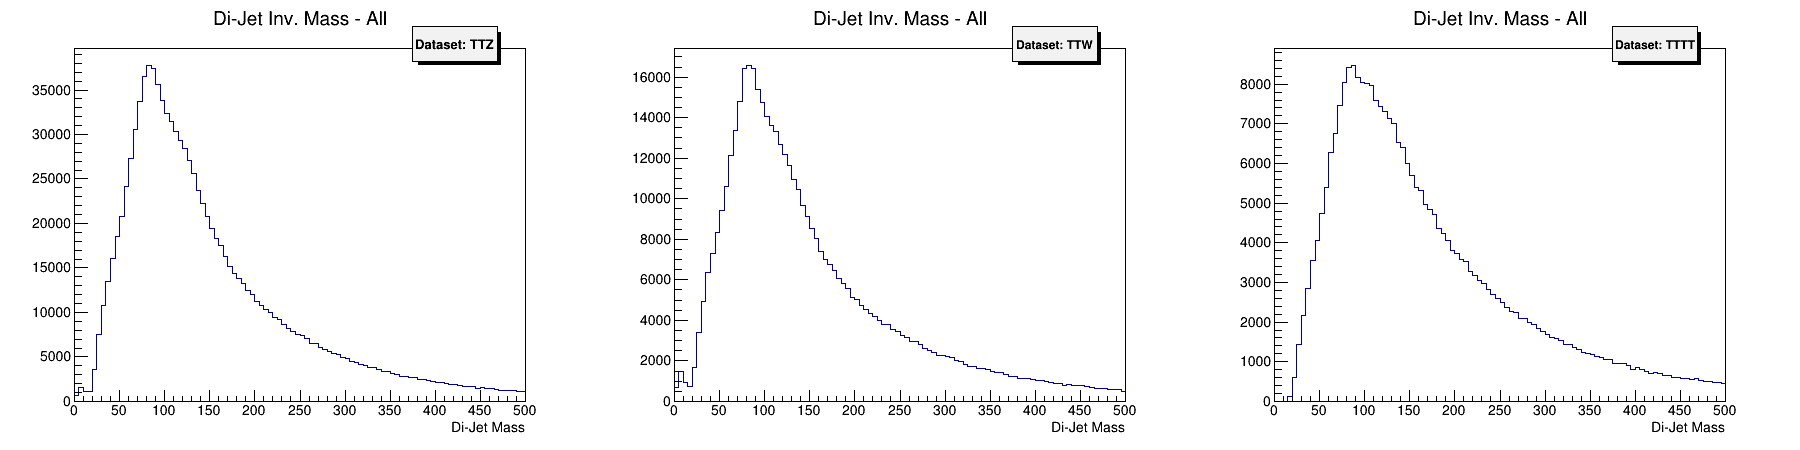

In [163]:
clear()
HC.hist_array_single('dijet_inv_mass')
CANVAS.Draw()

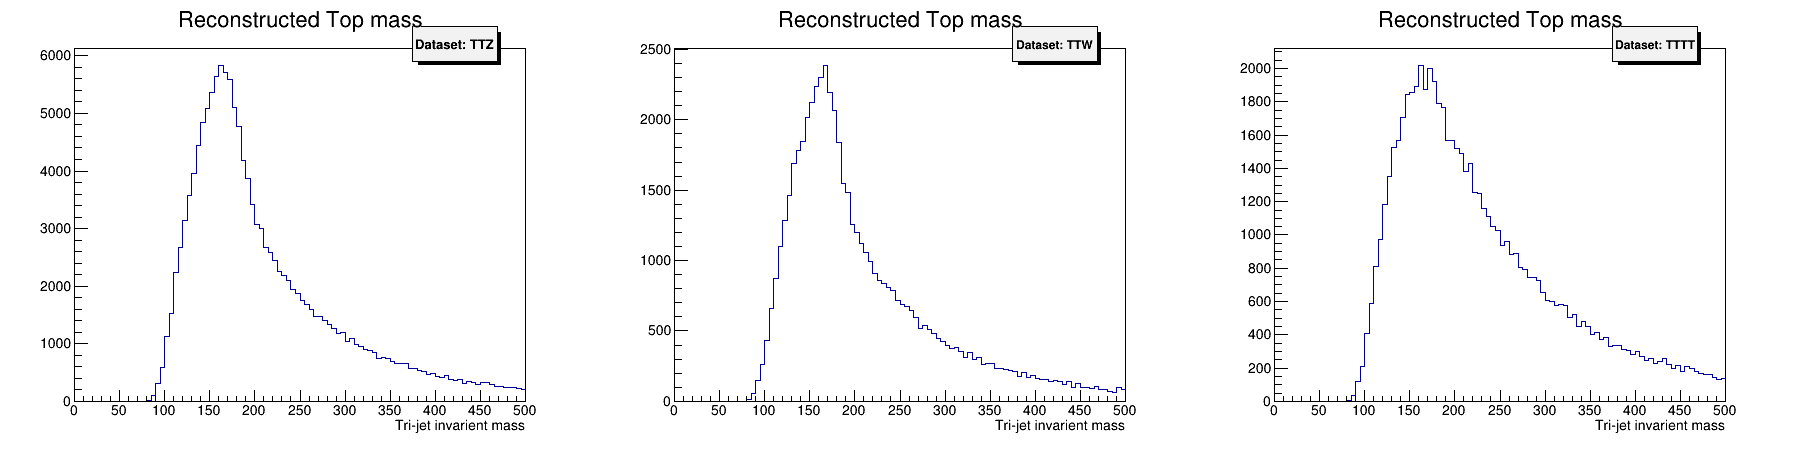

In [164]:
clear()
HC.hist_array_single('reco_top_mass')
CANVAS.Draw()

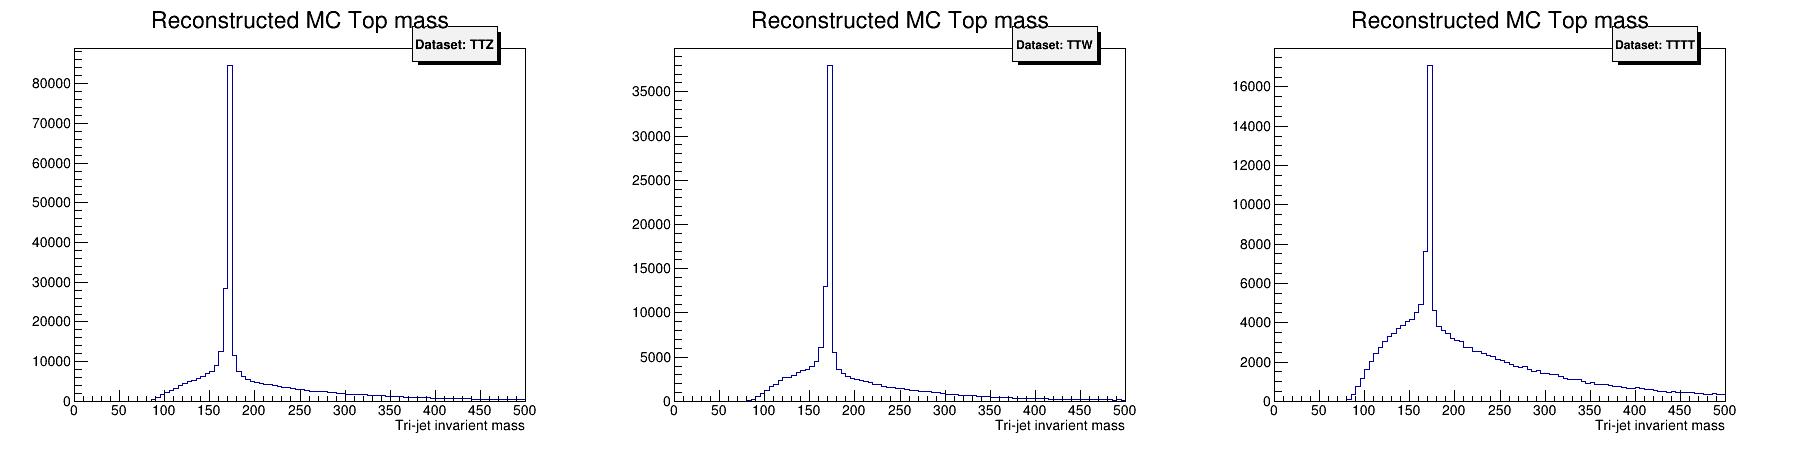

In [165]:
clear()
HC.hist_array_single('mc_top_mass')
CANVAS.Draw()

In [178]:
def function_impl(fname):
    from IPython.display import Markdown
    impl = hists_TTTT._function_impl_lookup[fname]
    return Markdown('```cpp\n{}\n```'.format(impl))
display(function_impl('t_mass'))

```cpp
([](const std::tuple<Jet, Jet> &w, const Jet &b) {
  return (std::get<0>(w).v + std::get<1>(w).v + b.v).M();
})

```

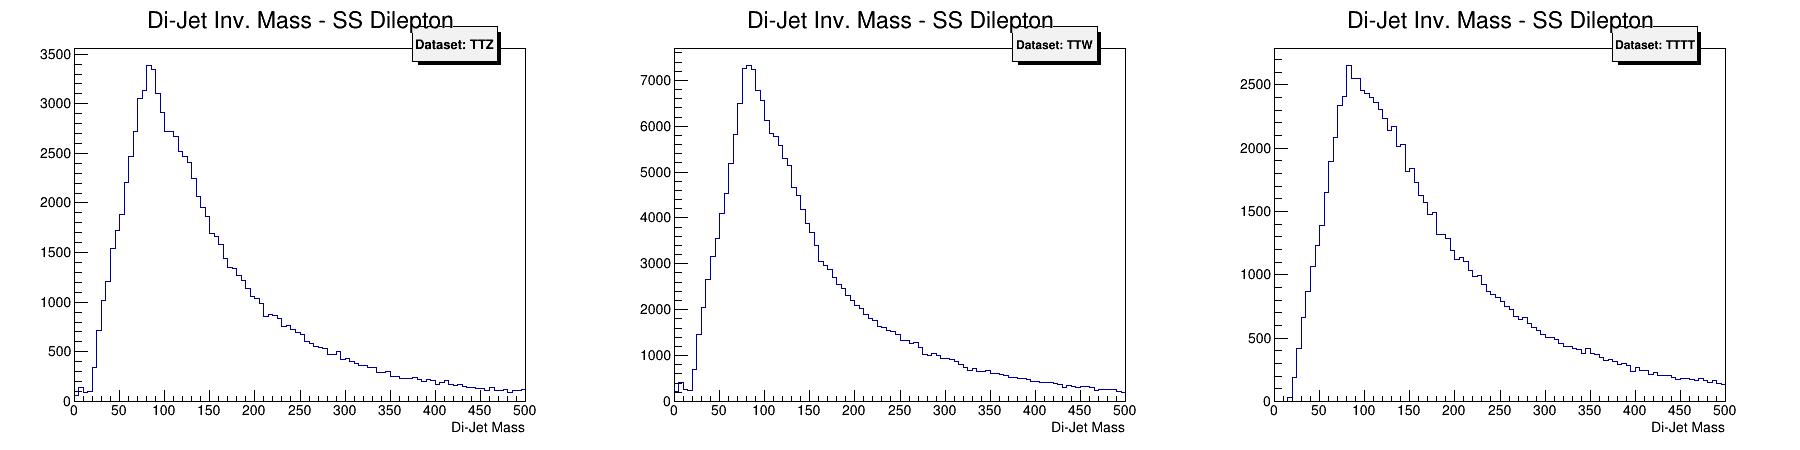

In [167]:
clear()
HC.hist_array_single('dijet_inv_mass_ssdilepton')
CANVAS.Draw()

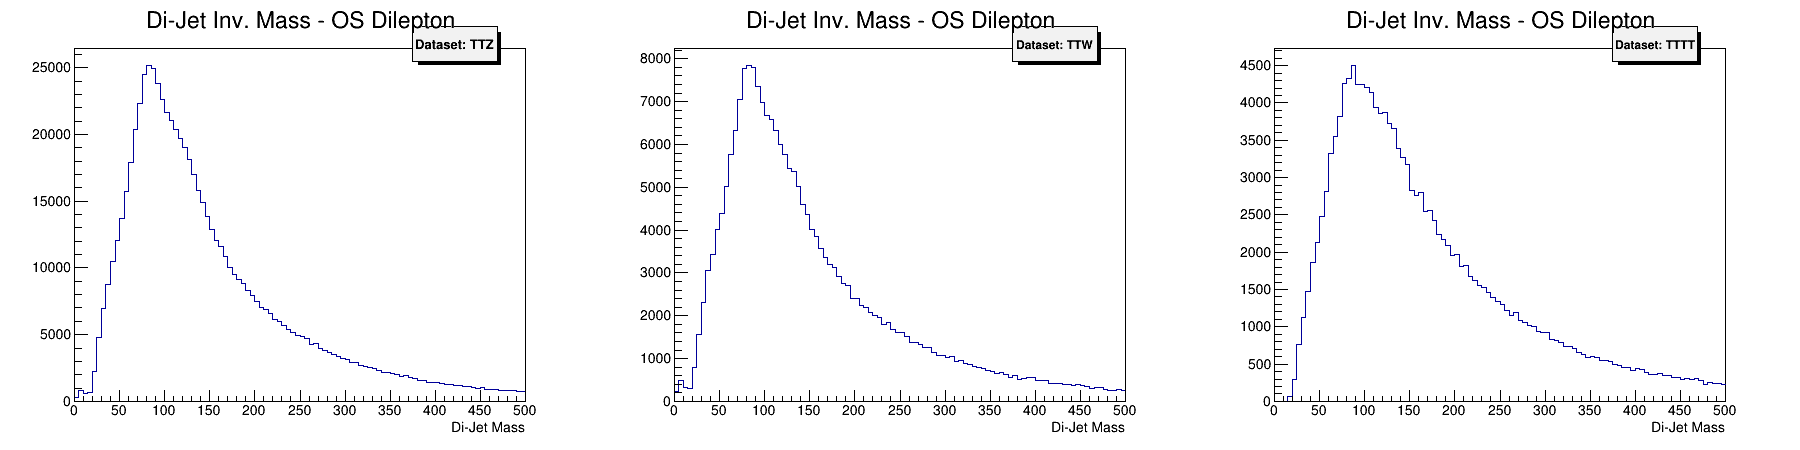

In [168]:
clear()
HC.hist_array_single('dijet_inv_mass_osdilepton')
CANVAS.Draw()

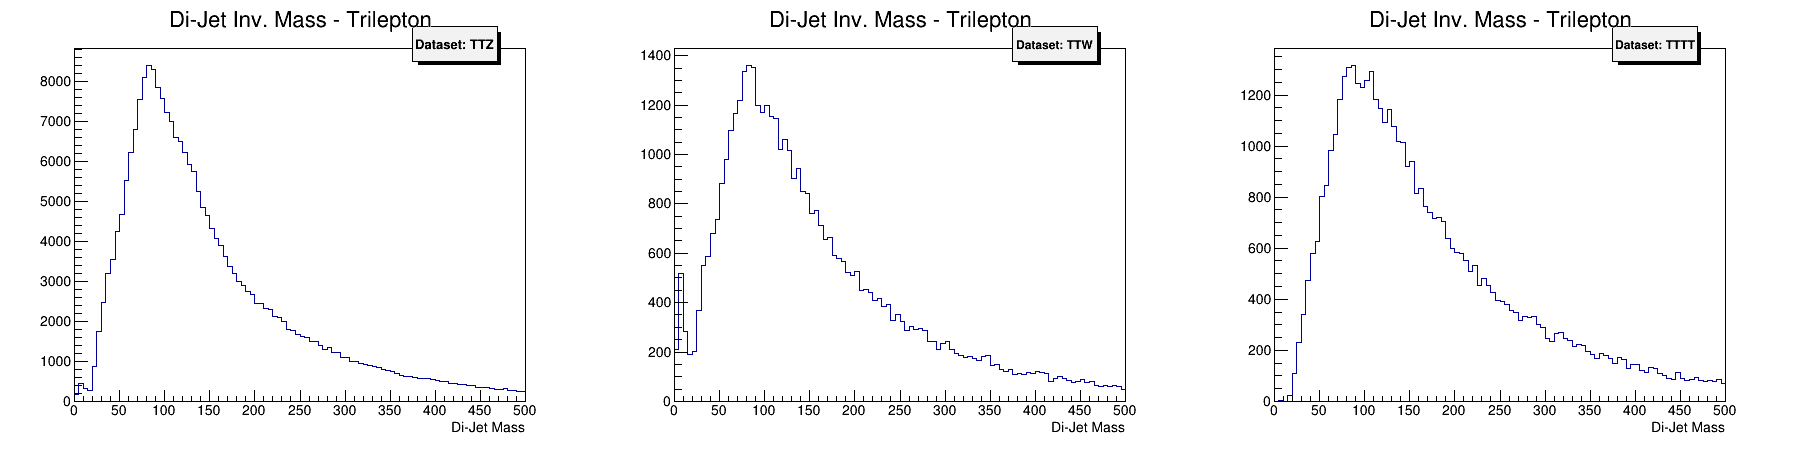

In [169]:
clear()
HC.hist_array_single('dijet_inv_mass_trilepton')
CANVAS.Draw()

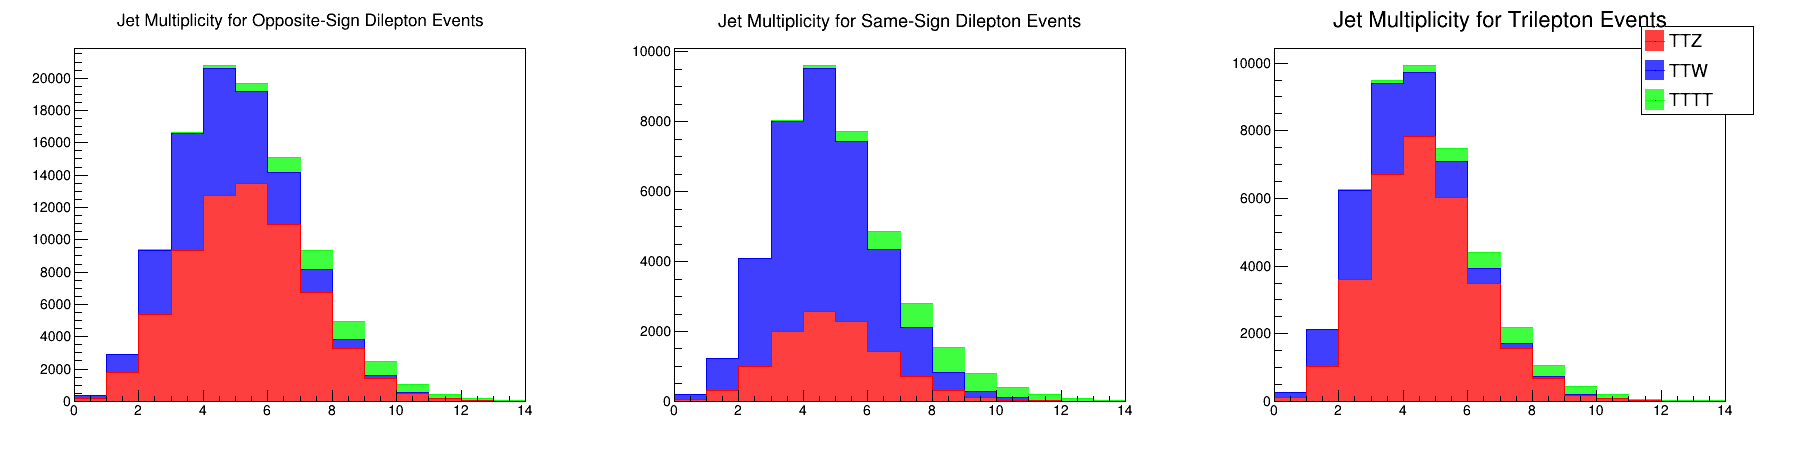

In [170]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=0,
                    enable_fill=True,
                    shape=(3,1),
                   )
CANVAS.Draw()

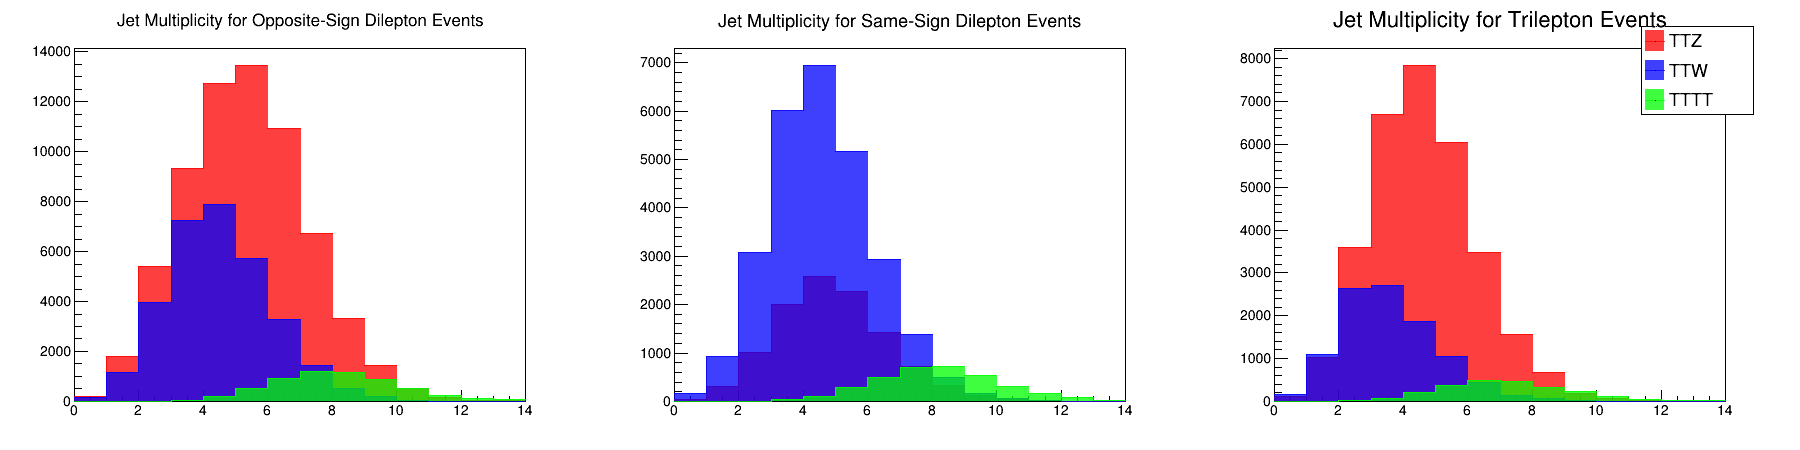

In [171]:
CANVAS.Clear()
HC.stack_hist_array(*zip(('jet_count_os_dilepton','Jet Multiplicity for Opposite-Sign Dilepton Events'),
                         ('jet_count_ss_dilepton','Jet Multiplicity for Same-Sign Dilepton Events'),
                         ('jet_count_trilepton', 'Jet Multiplicity for Trilepton Events')
                        ),
                    normalize_to=0,
                    enable_fill=True,
                    shape=(3,1),
                    draw_option='nostack',
                   )
CANVAS.Draw()

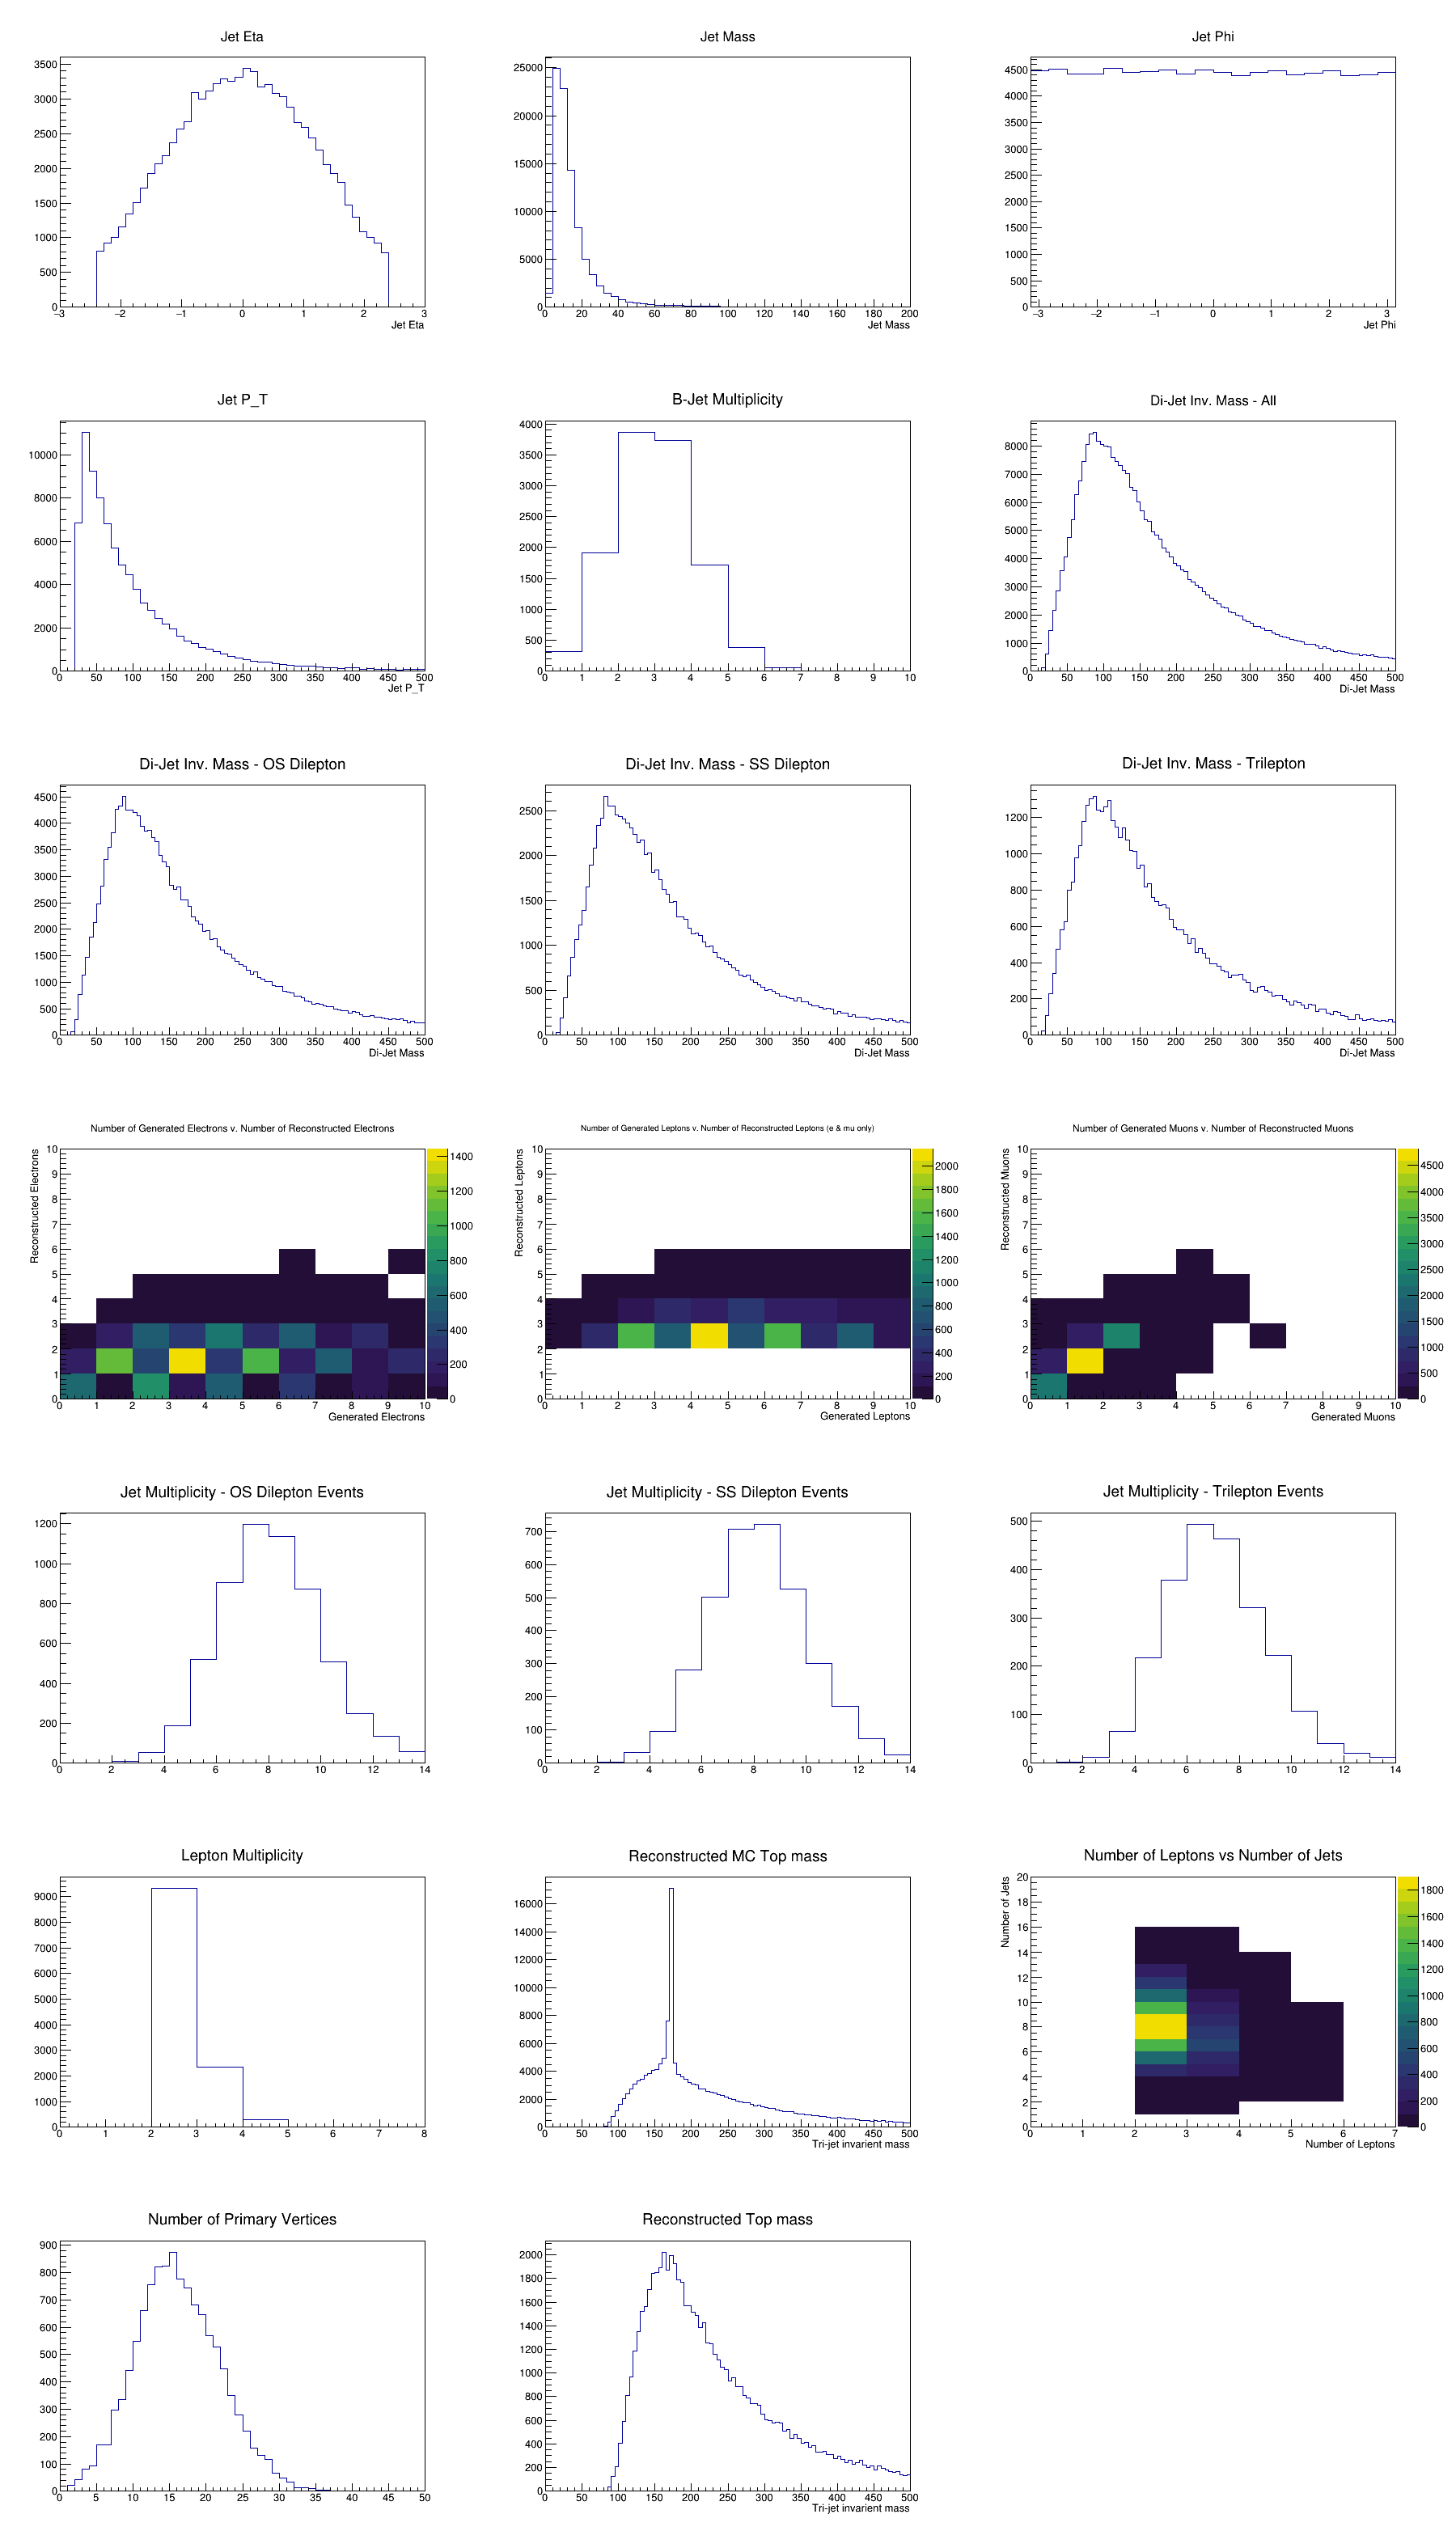

In [172]:
hists_TTTT.draw()

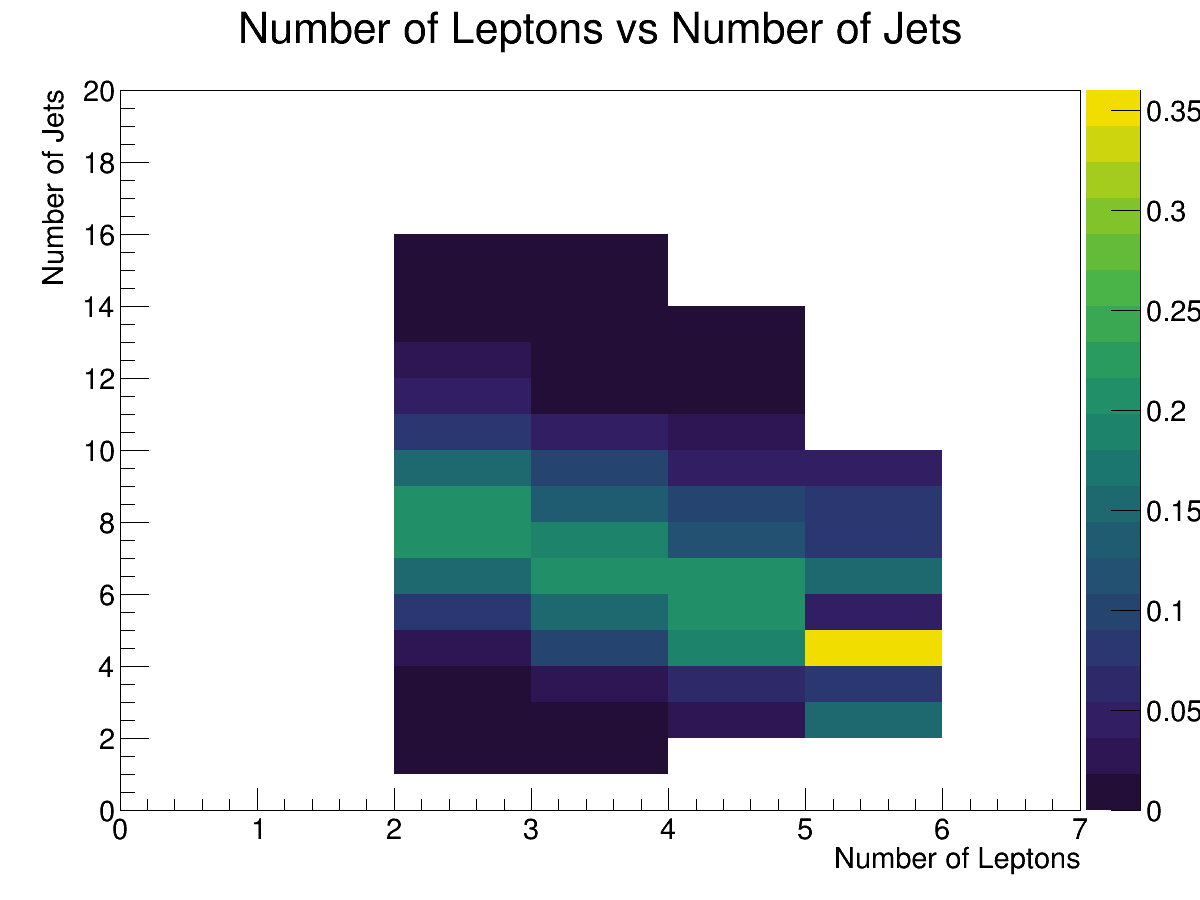

In [173]:
hists_TTTT.nLepvsnJet_norm = normalize_columns(hists_TTTT.nLepvsnJet)
hists_TTZ.nLepvsnJet_norm = normalize_columns(hists_TTZ.nLepvsnJet)
hists_TTW.nLepvsnJet_norm = normalize_columns(hists_TTW.nLepvsnJet)
clear()
hists_TTTT.nLepvsnJet_norm.Draw('COLZ')
CANVAS.Draw()

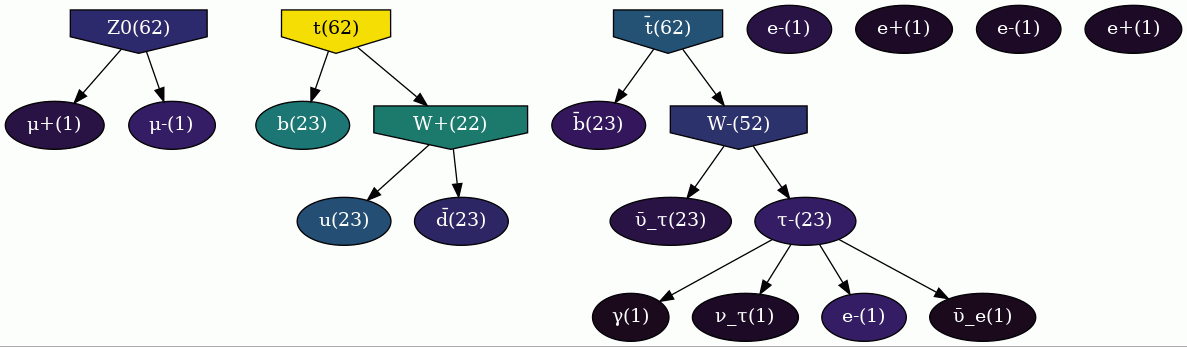

In [174]:
event_number = int(random.uniform(0,100))
TTZ_event = show_event(hists_TTZ, event_number)
TTW_event = show_event(hists_TTW, event_number)
TTTT_event = show_event(hists_TTTT, event_number)
display(TTZ_event)

We can use the `show_event` function to look at the Generator-Level particles for the event. They are color-coded based on their pt relative to the maximum pt of a particles in the event. Darker is lower, greener/lighter is higher. The following are the particle trees for event #{{event_number}} in each dataset.
  - TTZ Generator-Level Particles
{{TTZ_event}}
-----------------------------------------
  - TTW Generator-Level Particles
{{TTW_event}}
-----------------------------------------
  - TTTT Generator-Level Particles
{{TTTT_event}}

<ROOT.THStack object ("lepton_count_stack") at 0xf29026b0>

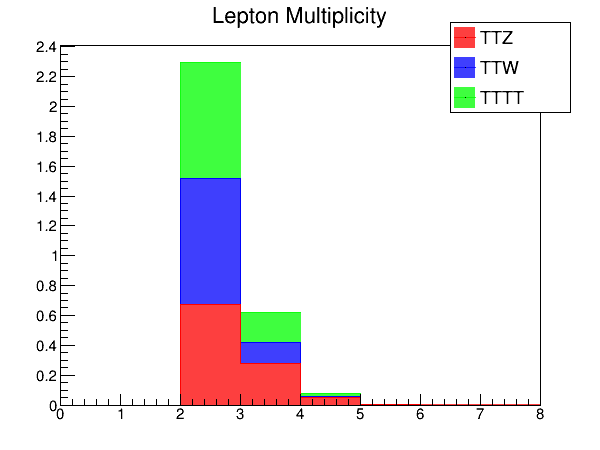

In [175]:
HC.stack_hist("lepton_count", title="Lepton Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

<ROOT.THStack object ("b_jet_count_stack") at 0xbca09100>

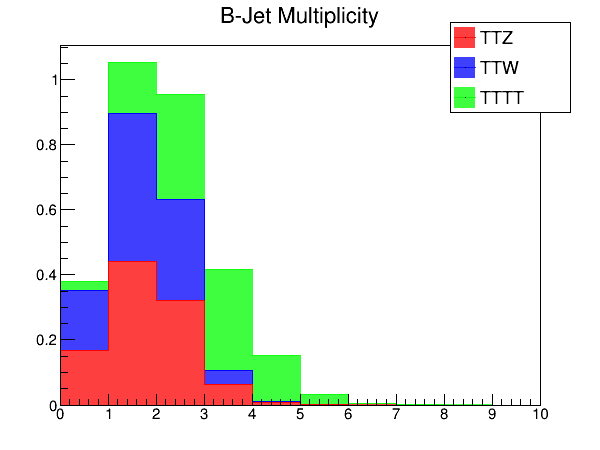

In [176]:
HC.stack_hist("b_jet_count", title="B-Jet Multiplicity",
              enable_fill=True, normalize_to=1, make_legend=True, draw=True)

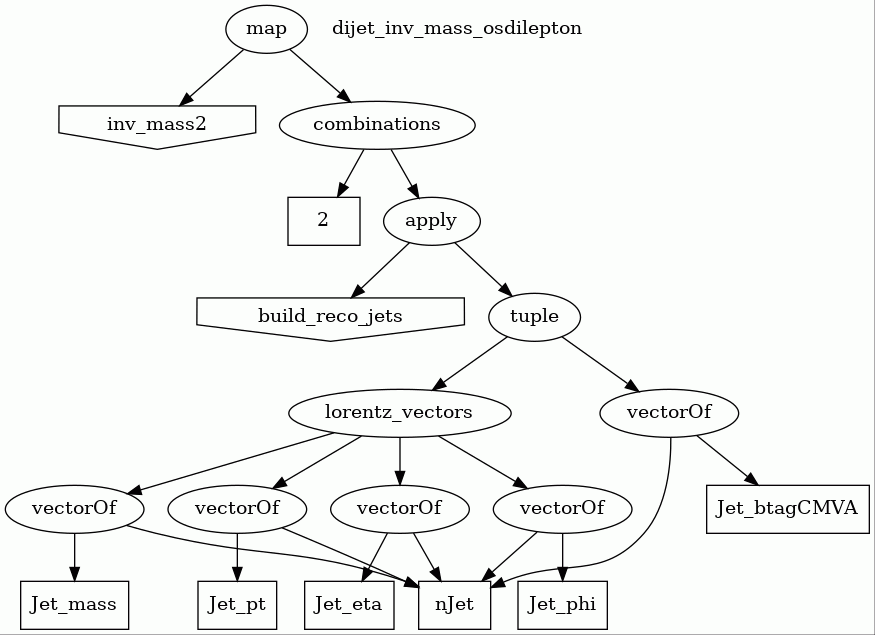

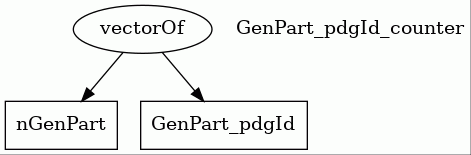

In [177]:
display(show_value(hists_TTTT.dijet_inv_mass_osdilepton))
display(show_value("GenPart_pdgId_counter"))